In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import geopandas as gpd
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Reading in the data 
orig_df = pd.read_csv("VIW_FNT.csv")

df = orig_df

### Data Loading

In [3]:
print(df.head())

  WHOREGION FLUSEASON HEMISPHERE           ITZ COUNTRY_CODE  \
0       AFR        NH         NH   FLU_NRT_AFR          DZA   
1       WPR        YR         NH   FLU_SE_ASIA          KHM   
2       EUR        NH         NH  FLU_CNT_ASIA          UZB   
3       AMR        YR         NH   FLU_CNT_AMC          NIC   
4       AFR        YR         NH   FLU_WST_AFR          CIV   

  COUNTRY_AREA_TERRITORY ISO_WEEKSTARTDATE  ISO_YEAR  ISO_WEEK  \
0                Algeria          11/29/21      2021        48   
1               Cambodia           6/15/15      2015        25   
2             Uzbekistan           2/13/17      2017         7   
3              Nicaragua           8/17/15      2015        34   
4          Côte d'Ivoire          10/29/12      2012        44   

  MMWR_WEEKSTARTDATE  ...  PARAINFLUENZA  RHINO  RSV  OTHERRESPVIRUS  \
0           11/28/21  ...            NaN    NaN  NaN             0.0   
1            6/14/15  ...            NaN    NaN  NaN             NaN   
2       

In [4]:
print(df.isnull().sum())

WHOREGION                       0
FLUSEASON                       0
HEMISPHERE                      0
ITZ                             0
COUNTRY_CODE                    0
COUNTRY_AREA_TERRITORY          0
ISO_WEEKSTARTDATE               0
ISO_YEAR                        0
ISO_WEEK                        0
MMWR_WEEKSTARTDATE              0
MMWR_YEAR                       0
MMWR_WEEK                       0
ORIGIN_SOURCE                   0
SPEC_PROCESSED_NB            7535
SPEC_RECEIVED_NB            91339
AH1N12009                   31963
AH1                         39158
AH3                         16128
AH5                         96922
AH7N9                      124926
ANOTSUBTYPED                19365
ANOTSUBTYPABLE             129546
AOTHER_SUBTYPE              99750
AOTHER_SUBTYPE_DETAILS     132922
INF_A                       10734
BVIC_2DEL                  135085
BVIC_3DEL                  136250
BVIC_NODEL                  37618
BVIC_DELUNK                134471
BYAM          

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139510 entries, 0 to 139509
Data columns (total 49 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   WHOREGION                139510 non-null  object 
 1   FLUSEASON                139510 non-null  object 
 2   HEMISPHERE               139510 non-null  object 
 3   ITZ                      139510 non-null  object 
 4   COUNTRY_CODE             139510 non-null  object 
 5   COUNTRY_AREA_TERRITORY   139510 non-null  object 
 6   ISO_WEEKSTARTDATE        139510 non-null  object 
 7   ISO_YEAR                 139510 non-null  int64  
 8   ISO_WEEK                 139510 non-null  int64  
 9   MMWR_WEEKSTARTDATE       139510 non-null  object 
 10  MMWR_YEAR                139510 non-null  int64  
 11  MMWR_WEEK                139510 non-null  int64  
 12  ORIGIN_SOURCE            139510 non-null  object 
 13  SPEC_PROCESSED_NB        131975 non-null  float64
 14  SPEC

### Data Cleaning

In [6]:
# Selecting only the values that are in the Southern Hemisphere

SH_DF = df.loc[df['HEMISPHERE'] == 'SH']
print(SH_DF.head())

   WHOREGION FLUSEASON HEMISPHERE              ITZ COUNTRY_CODE  \
14       AFR        YR         SH      FLU_MID_AFR          COD   
21       WPR        SH         SH  FLU_OCE_MEL_POL          AUS   
22       AMR        YR         SH     FLU_TRP_SAMR          ECU   
27       WPR        SH         SH  FLU_OCE_MEL_POL          FJI   
28       AMR        SH         SH    FLU_TEMP_SAMR          CHL   

              COUNTRY_AREA_TERRITORY ISO_WEEKSTARTDATE  ISO_YEAR  ISO_WEEK  \
14  Democratic Republic of the Congo          11/12/12      2012        46   
21                         Australia           7/20/09      2009        30   
22                           Ecuador           5/10/21      2021        19   
27                              Fiji           2/14/22      2022         7   
28                             Chile           3/23/20      2020        13   

   MMWR_WEEKSTARTDATE  ...  PARAINFLUENZA  RHINO  RSV  OTHERRESPVIRUS  \
14           11/11/12  ...            NaN    NaN  NaN  

In [7]:
print(SH_DF.isnull().sum())

WHOREGION                      0
FLUSEASON                      0
HEMISPHERE                     0
ITZ                            0
COUNTRY_CODE                   0
COUNTRY_AREA_TERRITORY         0
ISO_WEEKSTARTDATE              0
ISO_YEAR                       0
ISO_WEEK                       0
MMWR_WEEKSTARTDATE             0
MMWR_YEAR                      0
MMWR_WEEK                      0
ORIGIN_SOURCE                  0
SPEC_PROCESSED_NB            954
SPEC_RECEIVED_NB           10771
AH1N12009                   6344
AH1                         7366
AH3                         3166
AH5                        11257
AH7N9                      17652
ANOTSUBTYPED                3749
ANOTSUBTYPABLE             17478
AOTHER_SUBTYPE             12324
AOTHER_SUBTYPE_DETAILS     19421
INF_A                       2002
BVIC_2DEL                  18954
BVIC_3DEL                  19523
BVIC_NODEL                  7784
BVIC_DELUNK                18836
BYAM                        7914
BNOTDETERM

In [8]:
print(SH_DF.describe())

           ISO_YEAR      ISO_WEEK     MMWR_YEAR     MMWR_WEEK  \
count  20439.000000  20439.000000  20439.000000  20439.000000   
mean    2013.207544     25.993395   2013.206468     25.960761   
std        6.682904     14.798394      6.683793     14.797181   
min     1996.000000      1.000000   1996.000000      1.000000   
25%     2009.000000     13.000000   2009.000000     13.000000   
50%     2014.000000     26.000000   2014.000000     26.000000   
75%     2019.000000     38.000000   2019.000000     38.000000   
max     2023.000000     53.000000   2023.000000     53.000000   

       SPEC_PROCESSED_NB  SPEC_RECEIVED_NB     AH1N12009           AH1  \
count       19485.000000       9668.000000  14095.000000  13073.000000   
mean          323.678163        145.496587      7.398368      0.362962   
std          2368.396318        459.655462     47.878917      2.748327   
min             0.000000          0.000000      0.000000      0.000000   
25%            10.000000         12.000000  

In [9]:
update_sh_df = SH_DF[['WHOREGION', 'COUNTRY_CODE', 'ISO_YEAR', 'ORIGIN_SOURCE', 'AH1N12009', 'AH1', 'AH3', 'AH5', 'AH7N9', 'INF_A', 'BVIC_2DEL', 'BVIC_3DEL', 'BVIC_DELUNK', 'BVIC_NODEL', 'BYAM', 'INF_B', 'INF_ALL', 'INF_NEGATIVE', 'ADENO', 'BOCA', 'HUMAN_CORONA', 'METAPNEUMO', 'PARAINFLUENZA', 'RHINO', 'RSV']]

In [10]:
shDF = update_sh_df.sort_values(by = ['ISO_YEAR', 'COUNTRY_CODE'])

In [11]:
print(shDF.head())

      WHOREGION COUNTRY_CODE  ISO_YEAR ORIGIN_SOURCE  AH1N12009  AH1  AH3  \
81551       WPR          AUS      1996    NOTDEFINED        NaN  NaN  NaN   
47835       AFR          ZMB      1996    NOTDEFINED        NaN  0.0  0.0   
6716        AMR          ARG      1997    NOTDEFINED        NaN  NaN  NaN   
27889       AMR          ARG      1997    NOTDEFINED        NaN  4.0  NaN   
35622       AMR          ARG      1997    NOTDEFINED        NaN  NaN  NaN   

       AH5  AH7N9  INF_A  ...  INF_B  INF_ALL  INF_NEGATIVE  ADENO  BOCA  \
81551  NaN    NaN    1.0  ...    0.0      1.0           NaN    NaN   NaN   
47835  NaN    NaN    0.0  ...    0.0      0.0           NaN    NaN   NaN   
6716   NaN    NaN    NaN  ...    NaN      NaN           NaN    NaN   NaN   
27889  NaN    NaN    4.0  ...    NaN      NaN           NaN    NaN   NaN   
35622  NaN    NaN    NaN  ...    8.0      NaN           NaN    NaN   NaN   

       HUMAN_CORONA  METAPNEUMO  PARAINFLUENZA  RHINO  RSV  
81551           NaN

In [12]:
shDF = shDF.loc[shDF['ISO_YEAR'] >= 2010]

In [13]:
print(shDF.describe())

           ISO_YEAR     AH1N12009          AH1           AH3          AH5  \
count  15069.000000  13690.000000  9706.000000  13805.000000  8861.000000   
mean    2016.509788      5.696275     0.006285      7.105614     0.000451   
std        3.834856     27.439946     0.102828     28.689739     0.026019   
min     2010.000000      0.000000     0.000000      0.000000     0.000000   
25%     2013.000000      0.000000     0.000000      0.000000     0.000000   
50%     2017.000000      0.000000     0.000000      0.000000     0.000000   
75%     2020.000000      2.000000     0.000000      3.000000     0.000000   
max     2023.000000    896.000000     4.000000   1179.000000     2.000000   

        AH7N9         INF_A    BVIC_2DEL   BVIC_3DEL  BVIC_DELUNK  ...  \
count  2787.0  13942.000000  1485.000000  916.000000  1603.000000  ...   
mean      0.0     18.037297     0.352862    0.068777     1.232065  ...   
std       0.0     70.888484     1.321882    0.439407     6.637750  ...   
min       

In [14]:
unique_region = set(shDF['WHOREGION'])
print(unique_region)

{'SEAR', 'WPR', 'AMR', 'AFR'}


In [15]:
unique_col = shDF.columns
unique_col = unique_col.drop(['WHOREGION', 'COUNTRY_CODE', 'ORIGIN_SOURCE', 'ISO_YEAR'])
print(unique_col)

Index(['AH1N12009', 'AH1', 'AH3', 'AH5', 'AH7N9', 'INF_A', 'BVIC_2DEL',
       'BVIC_3DEL', 'BVIC_DELUNK', 'BVIC_NODEL', 'BYAM', 'INF_B', 'INF_ALL',
       'INF_NEGATIVE', 'ADENO', 'BOCA', 'HUMAN_CORONA', 'METAPNEUMO',
       'PARAINFLUENZA', 'RHINO', 'RSV'],
      dtype='object')


In [16]:
unique_year = set(shDF['ISO_YEAR'])
year = sorted(list(unique_year))
print(year)


[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


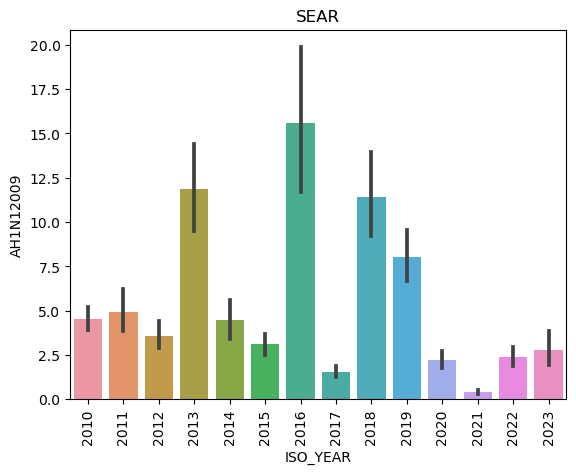

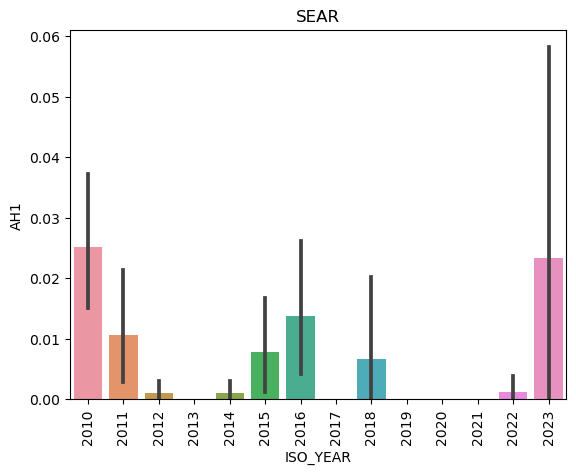

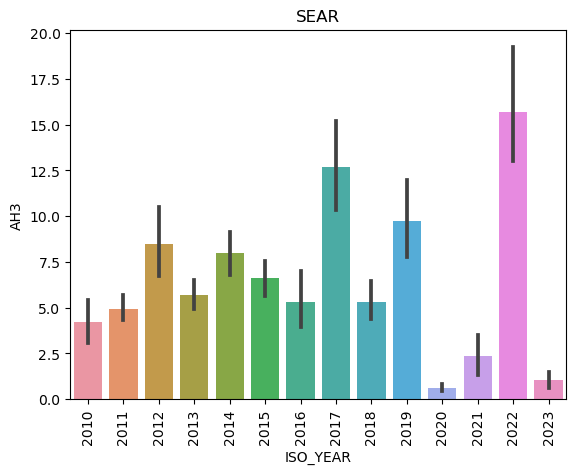

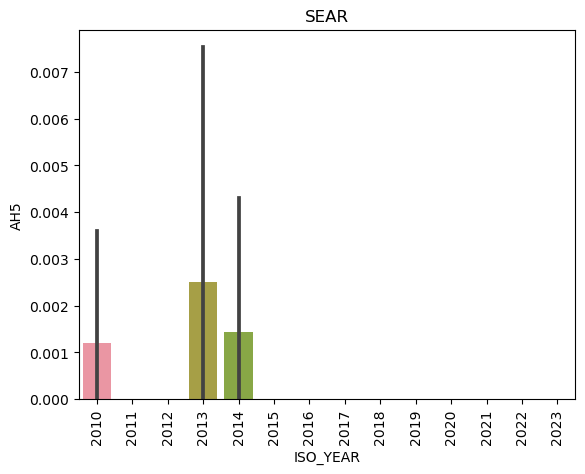

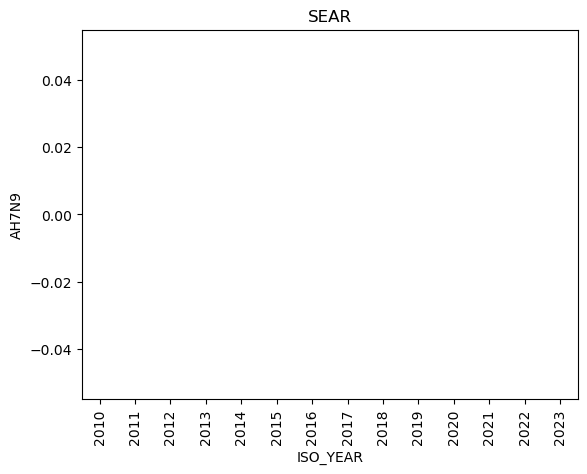

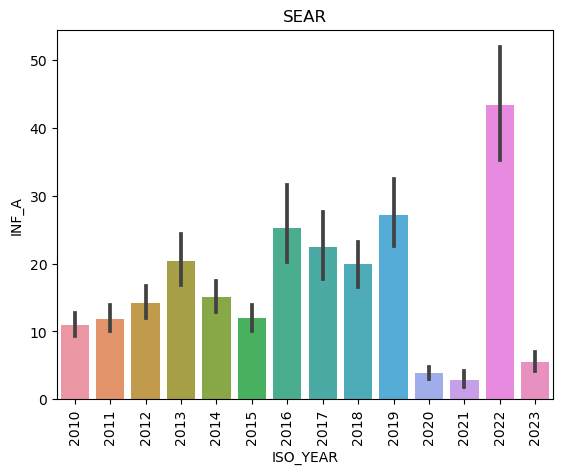

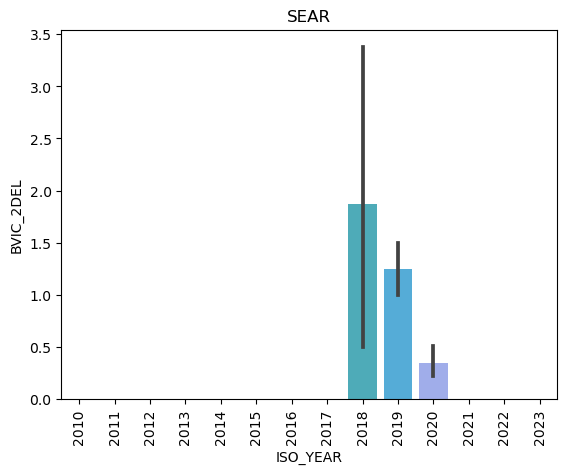

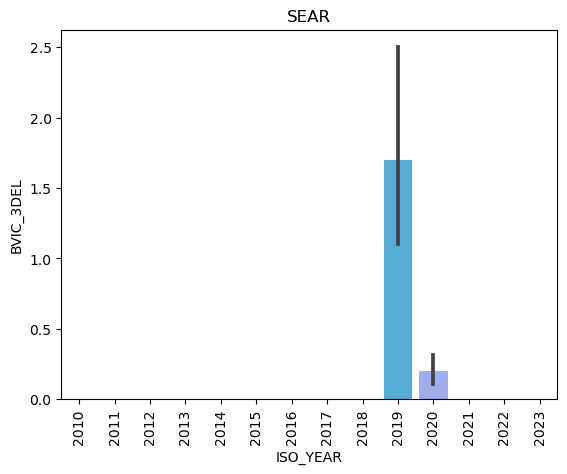

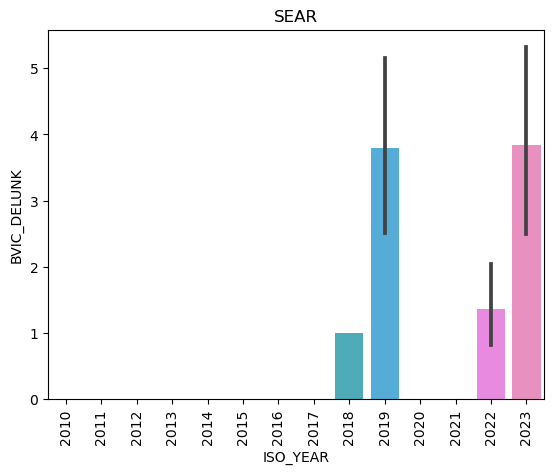

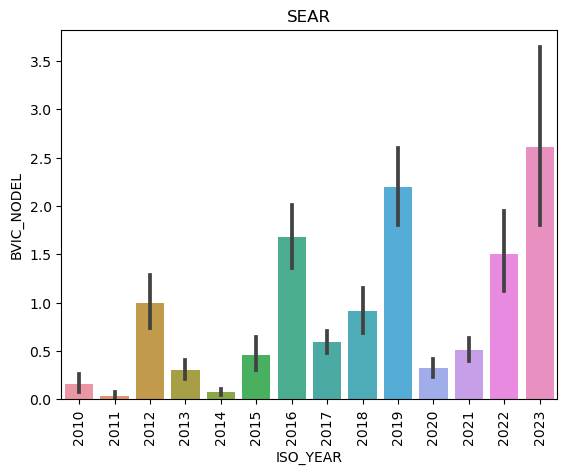

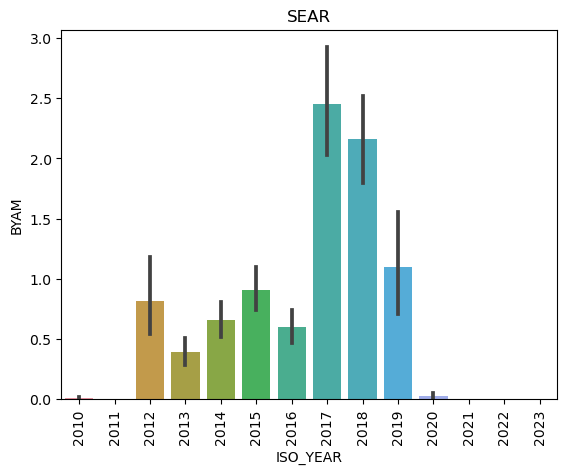

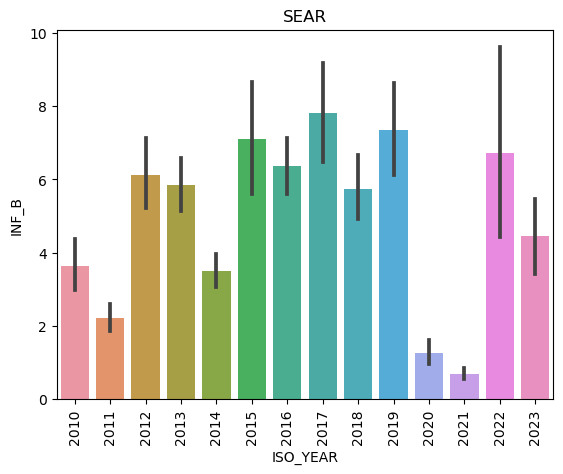

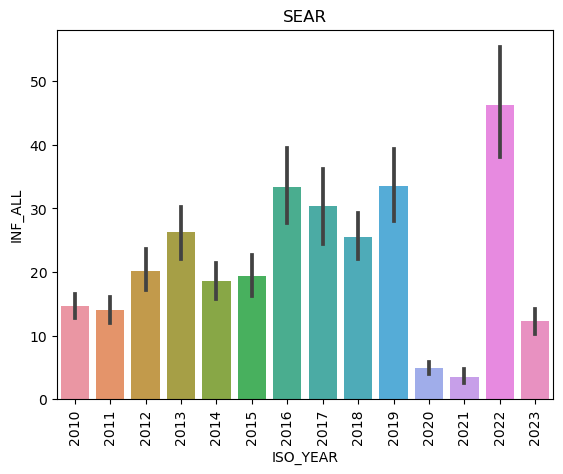

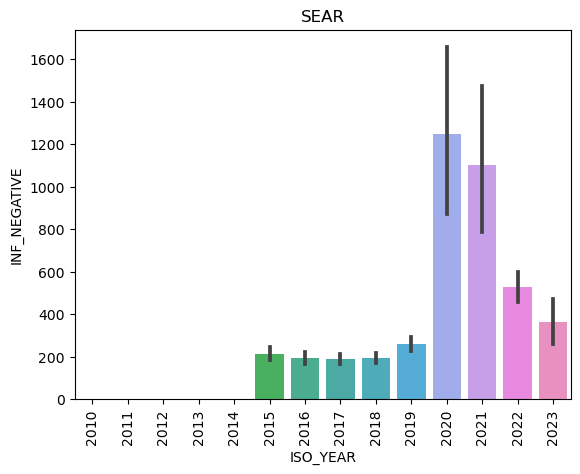

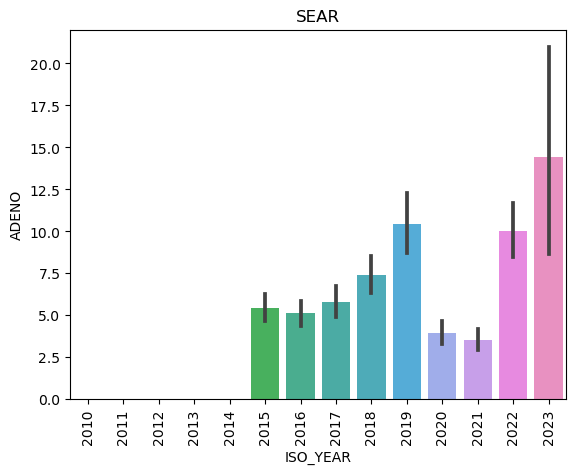

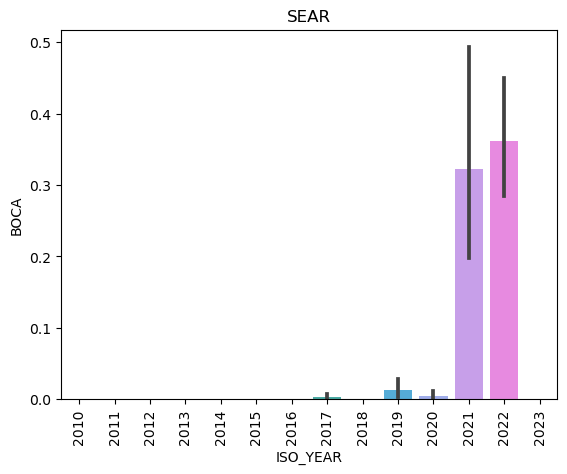

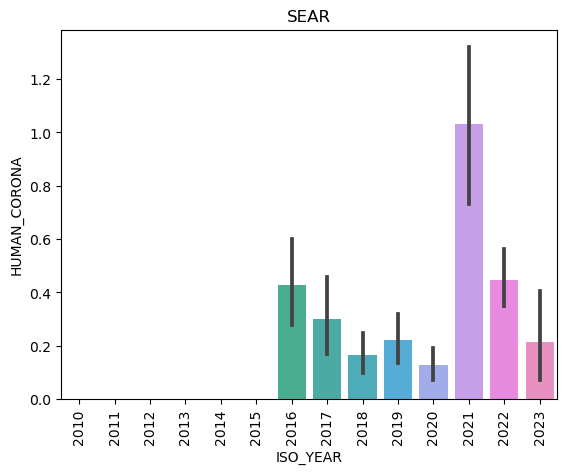

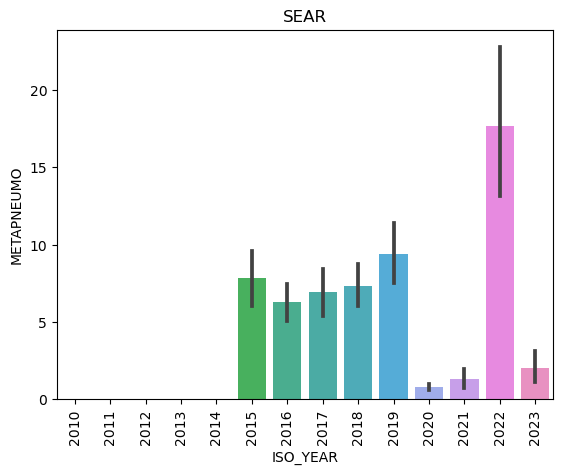

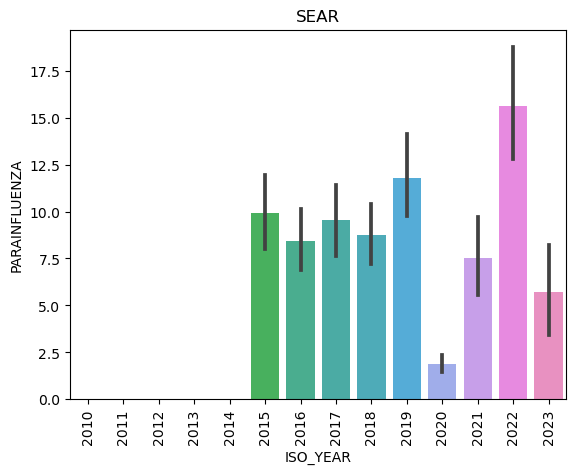

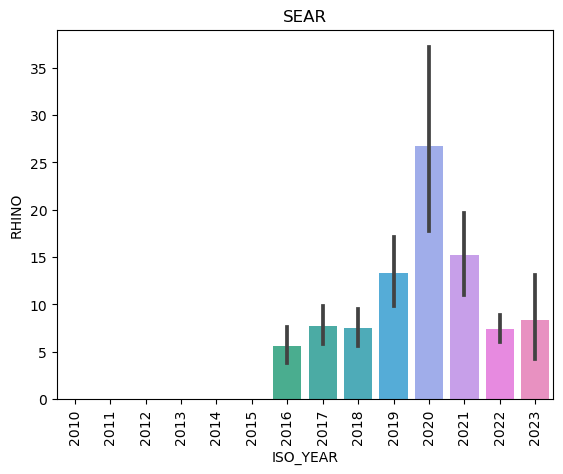

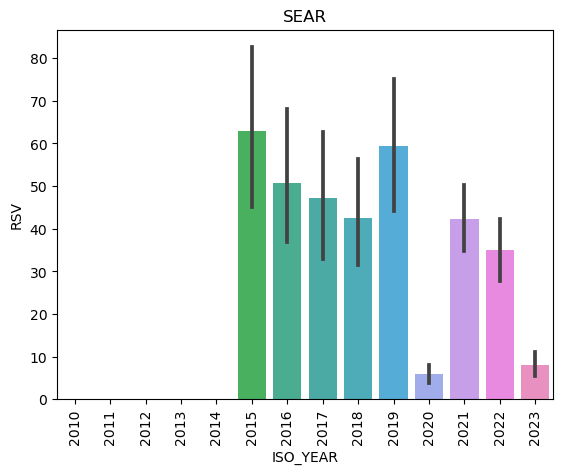

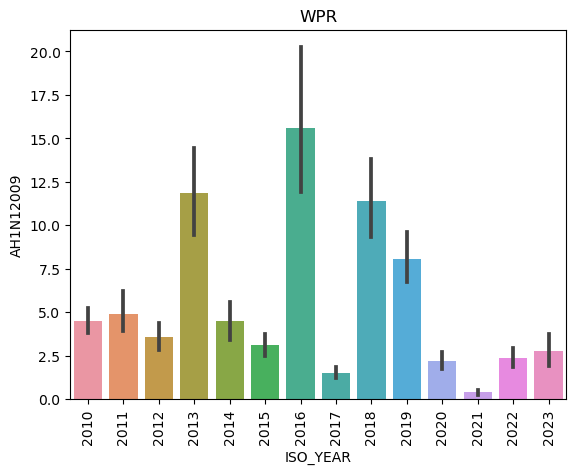

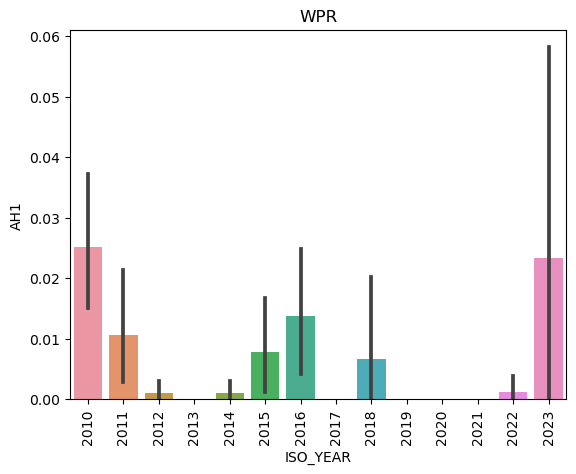

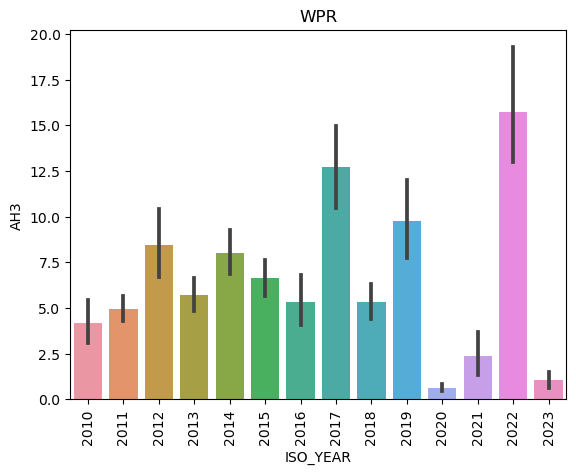

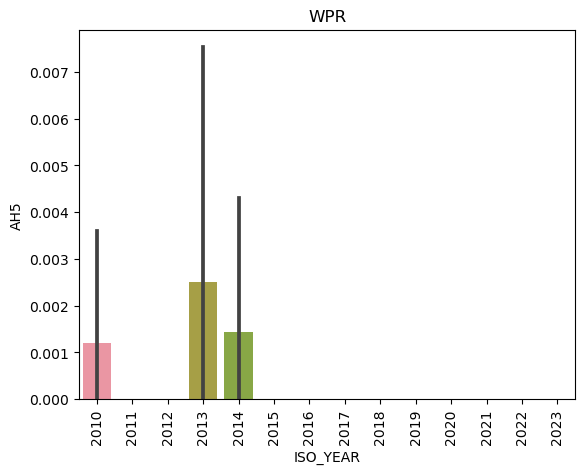

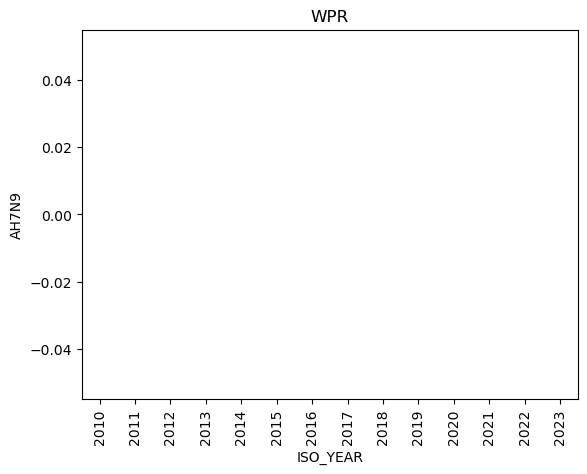

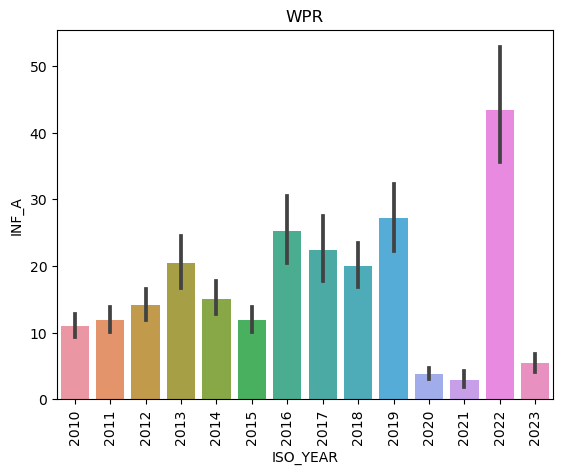

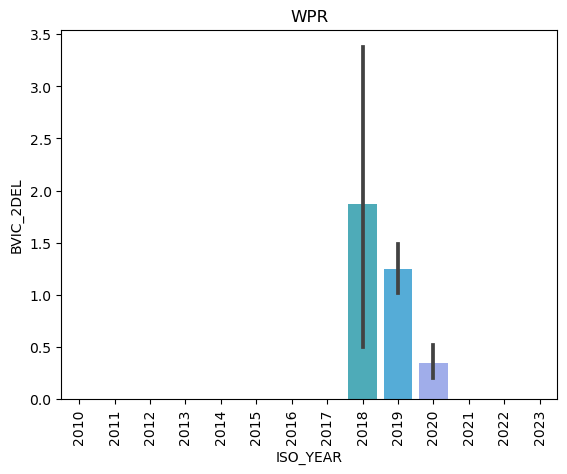

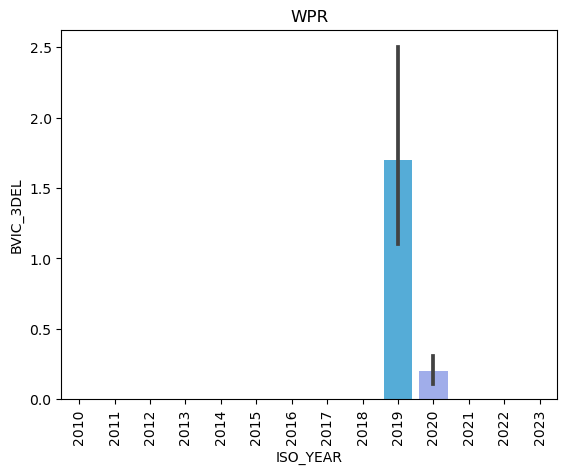

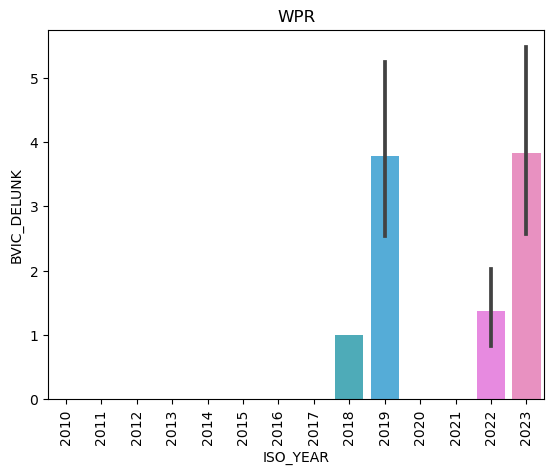

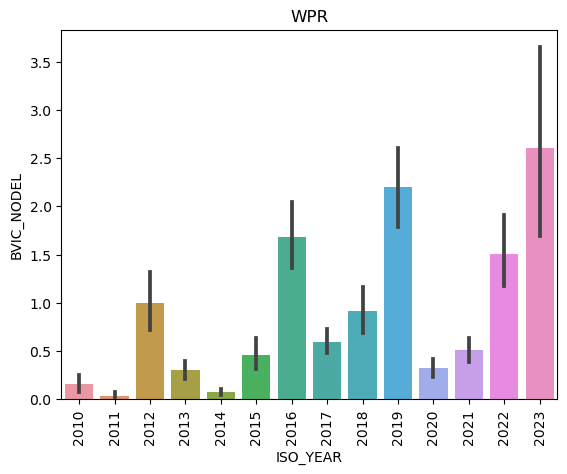

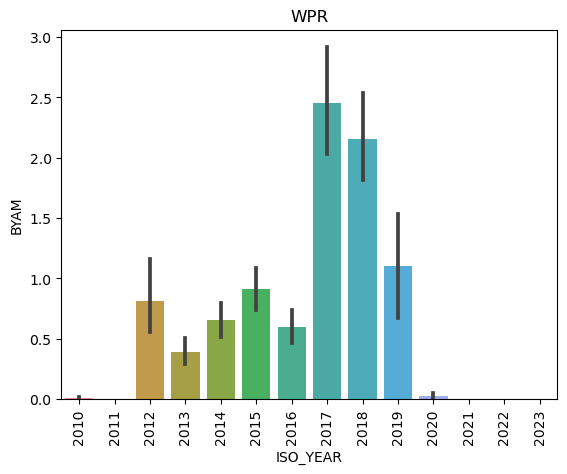

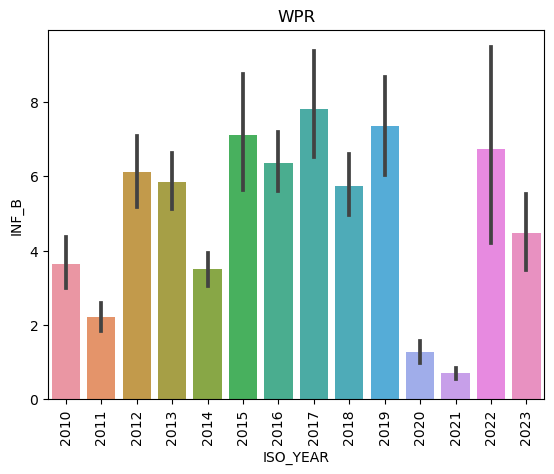

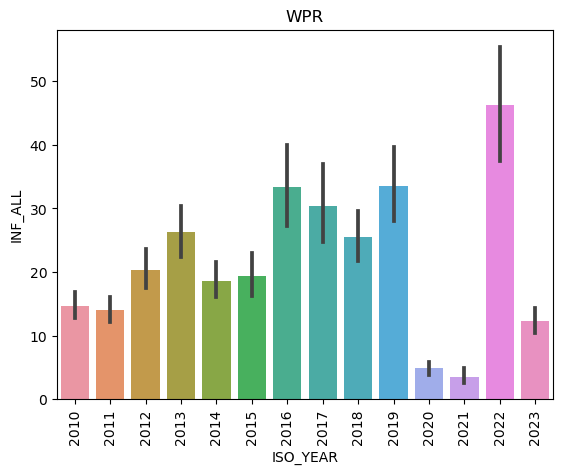

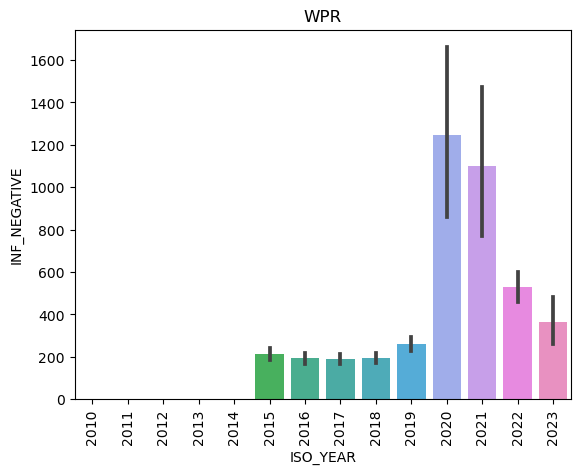

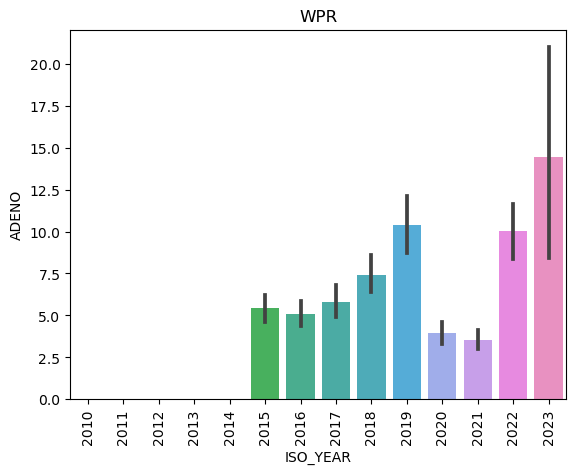

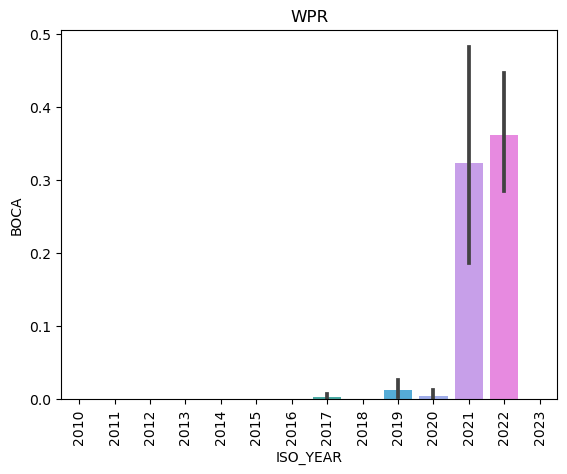

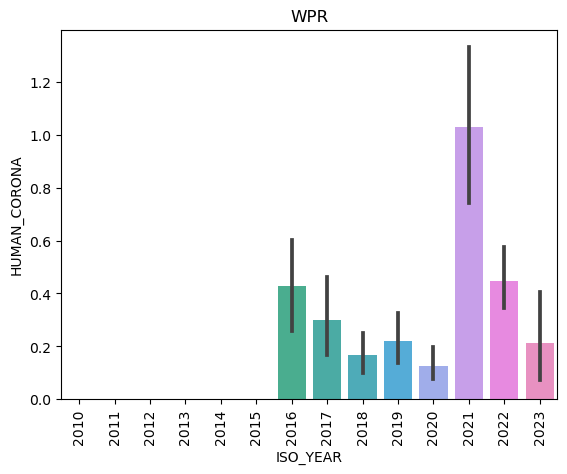

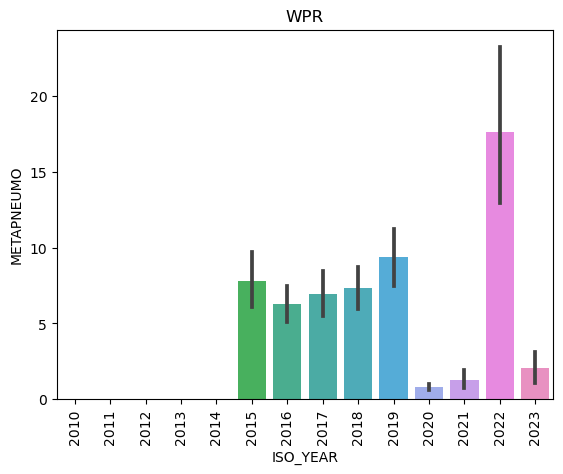

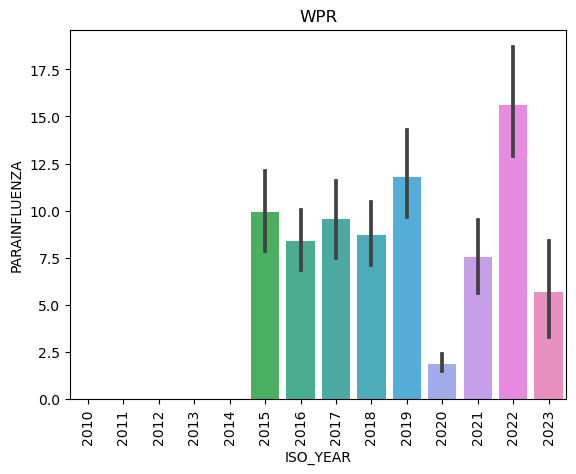

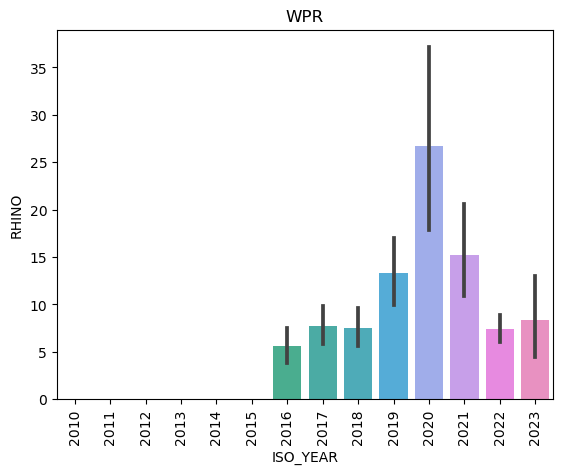

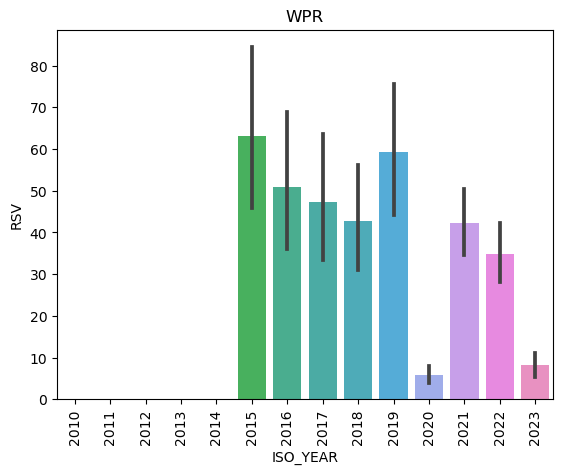

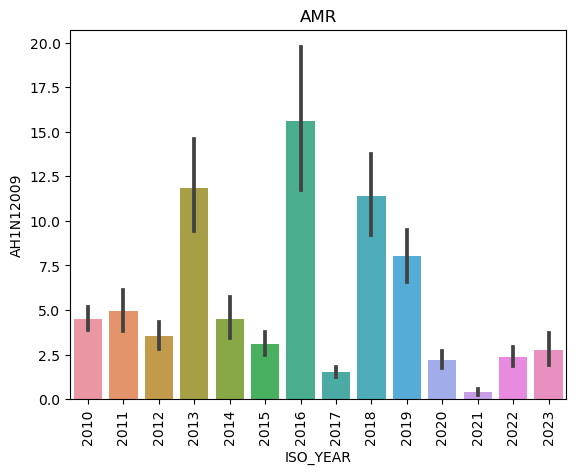

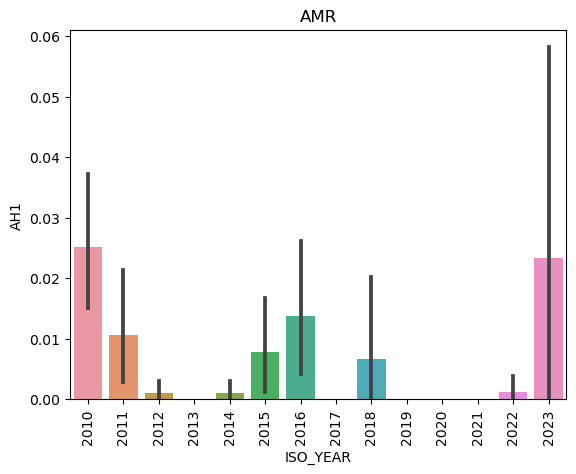

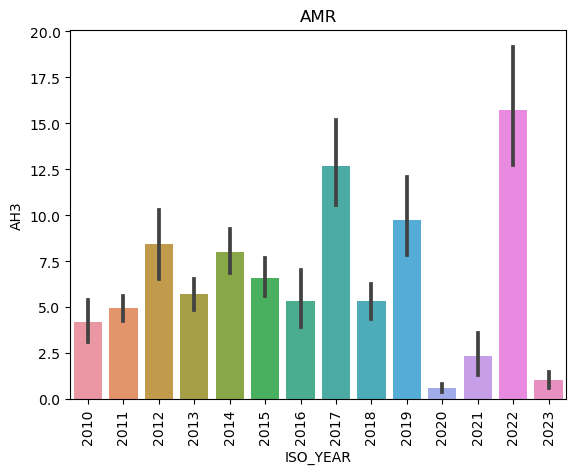

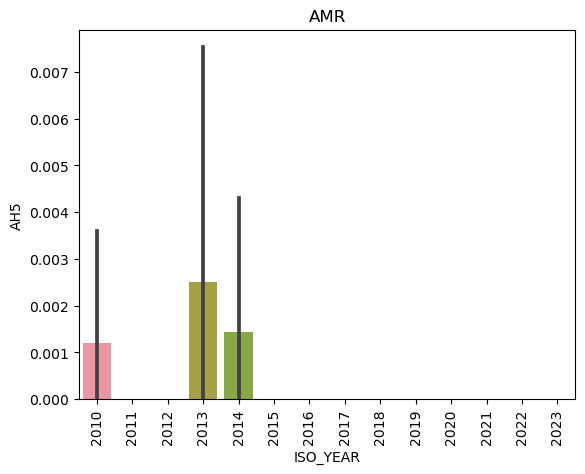

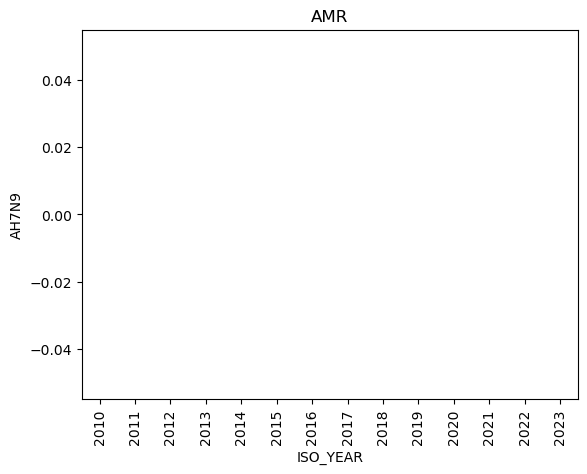

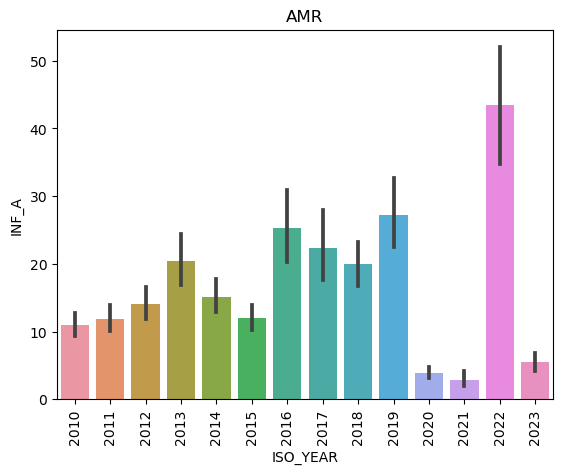

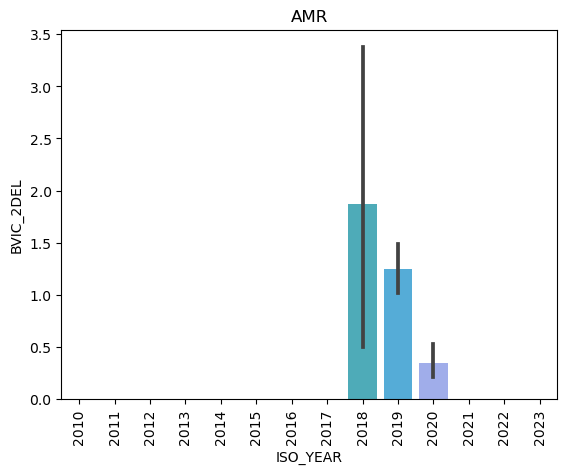

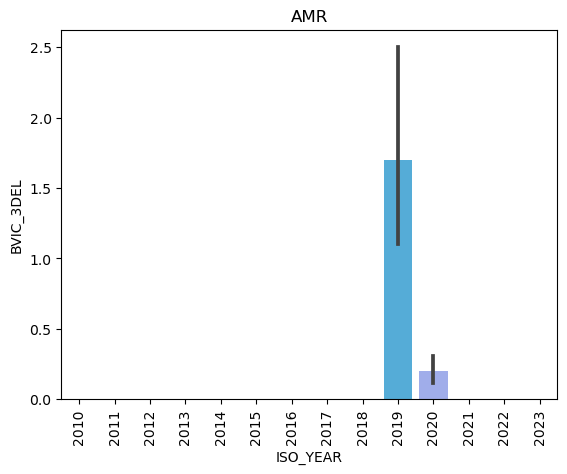

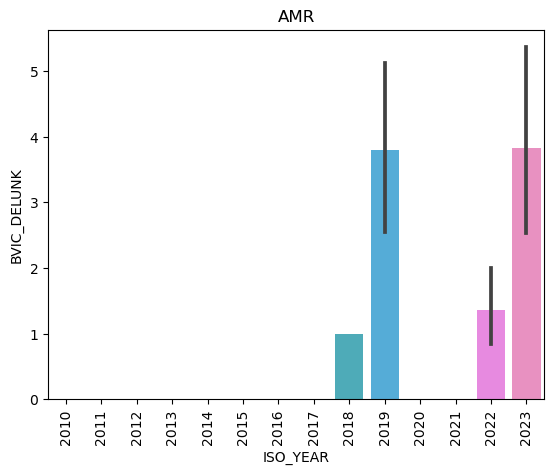

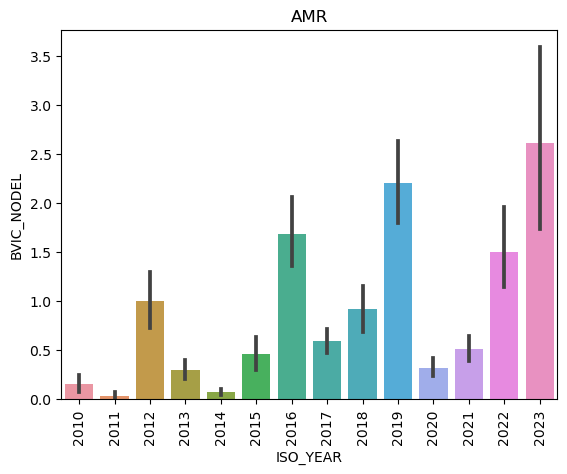

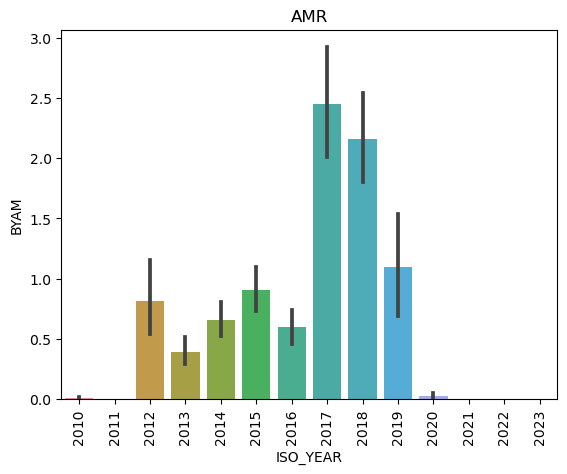

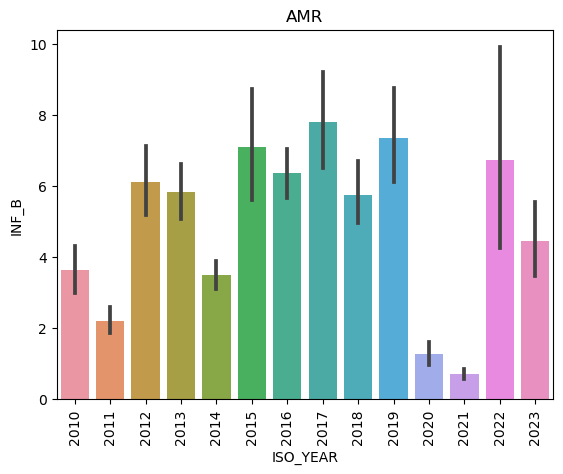

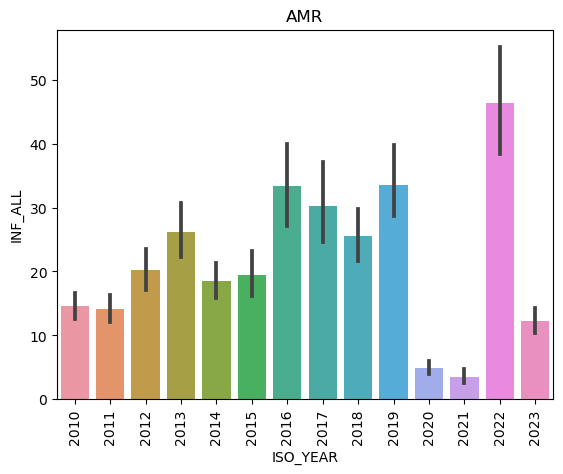

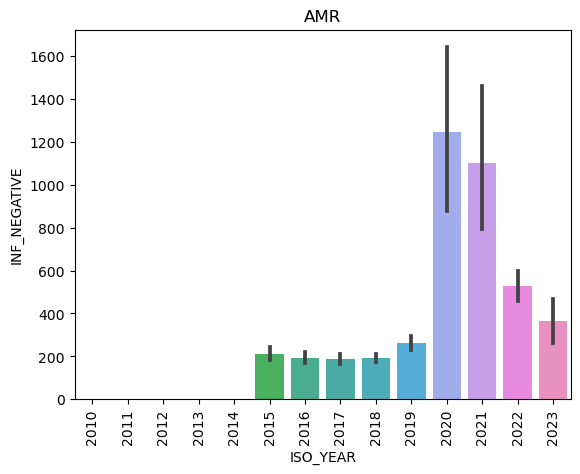

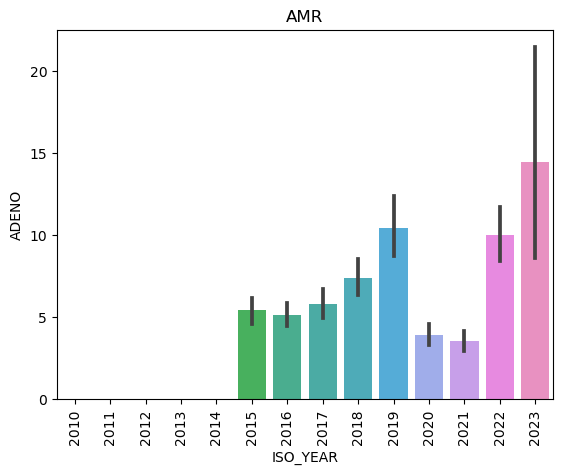

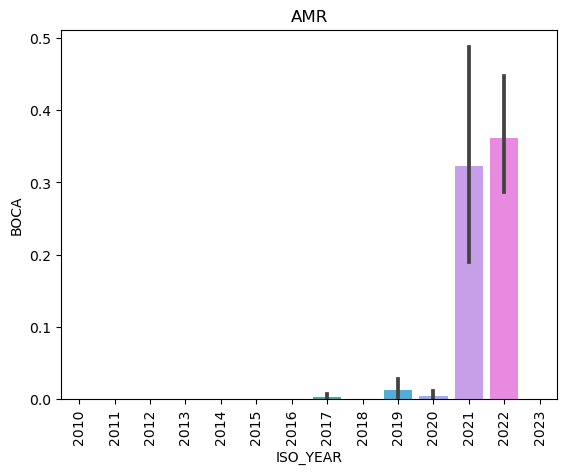

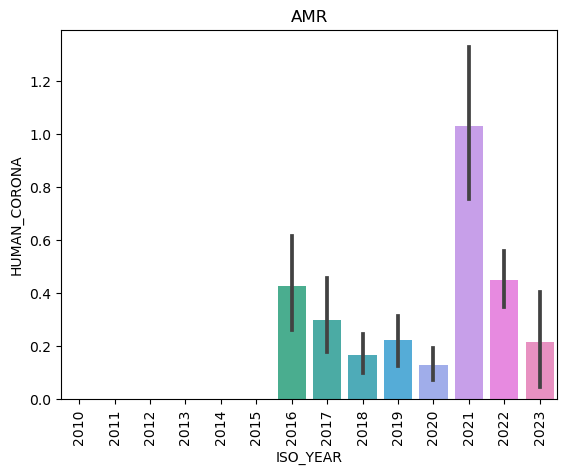

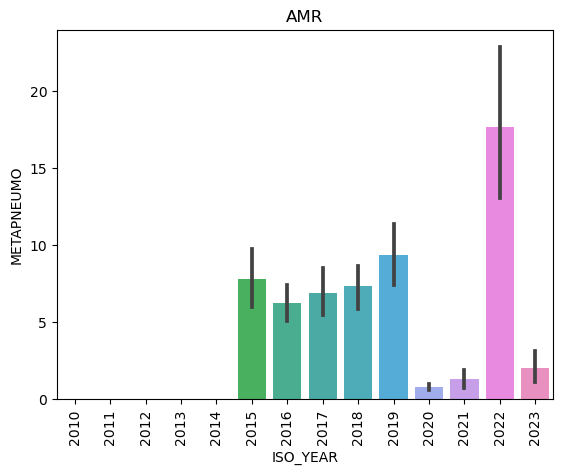

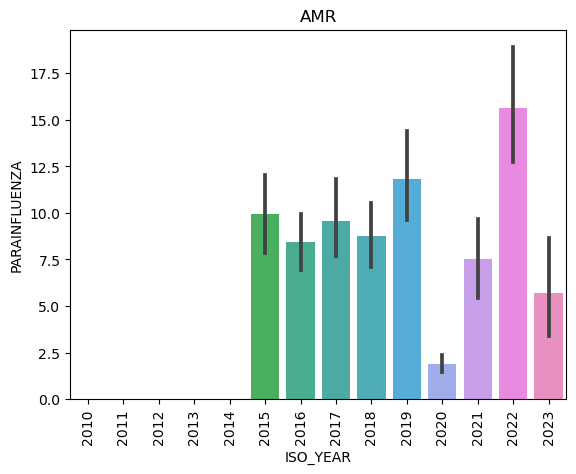

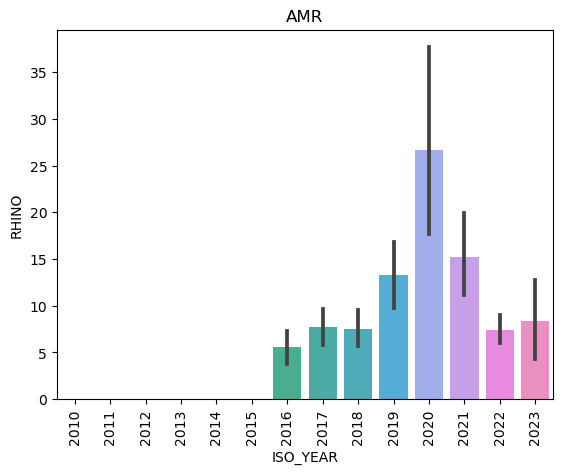

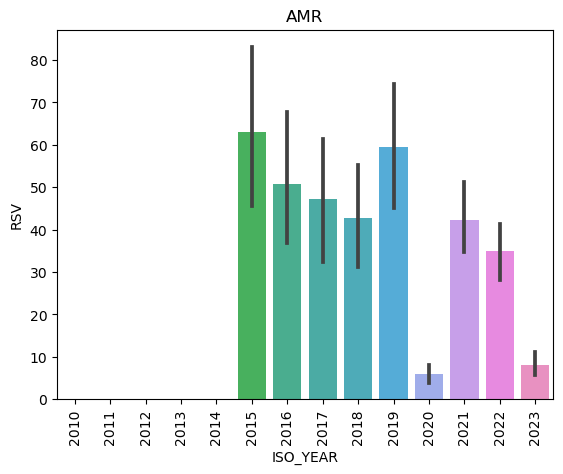

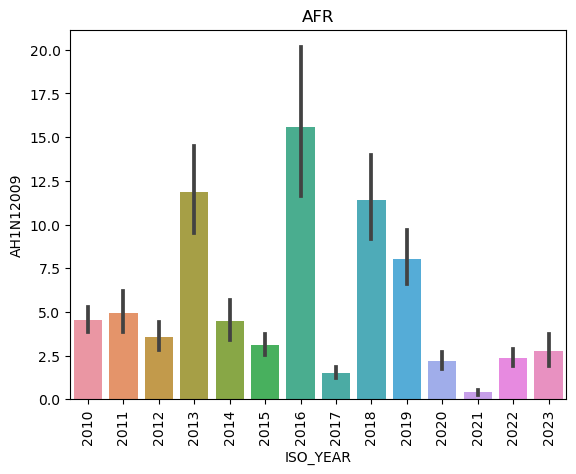

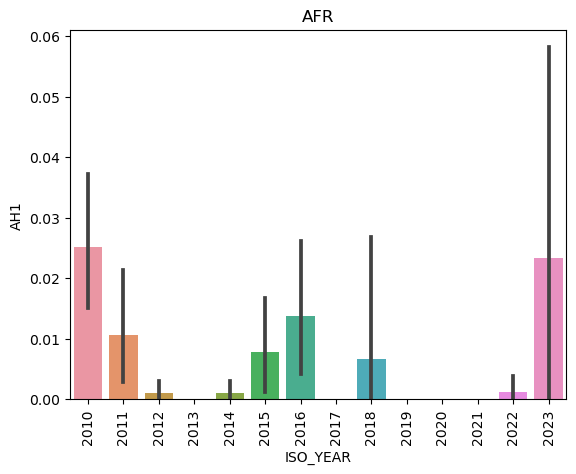

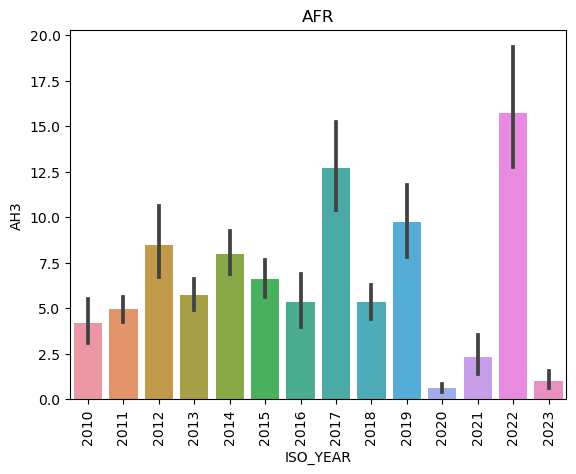

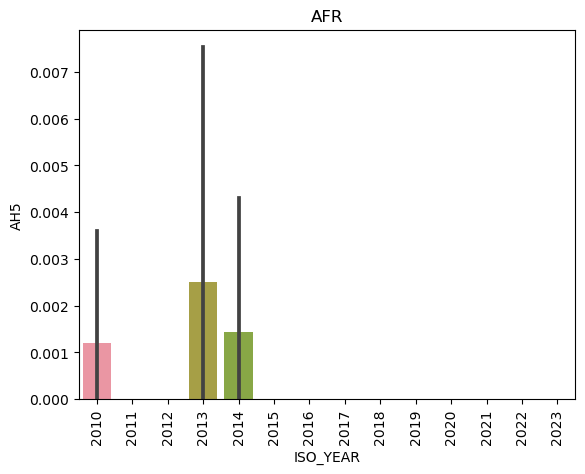

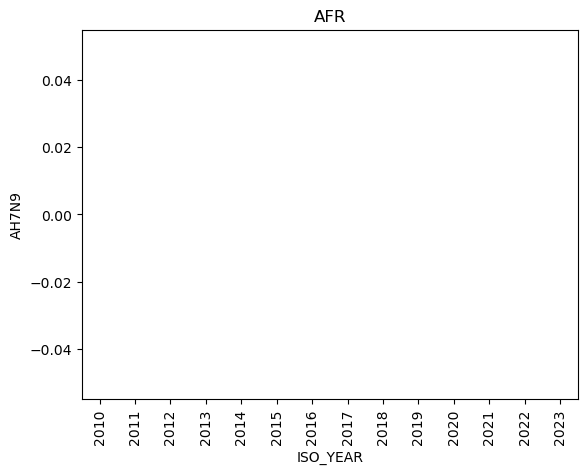

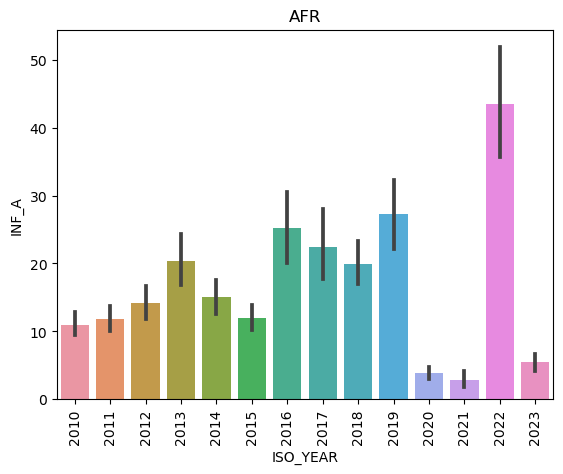

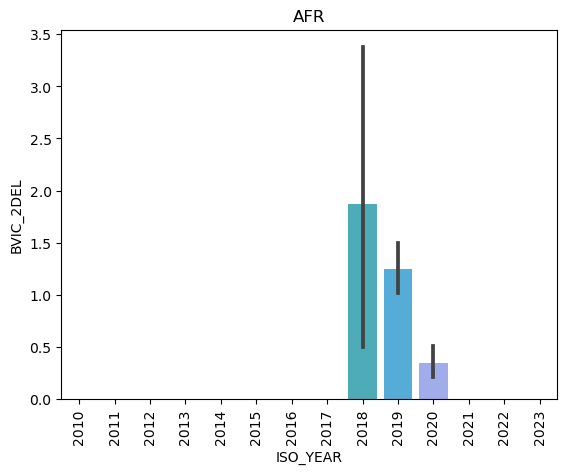

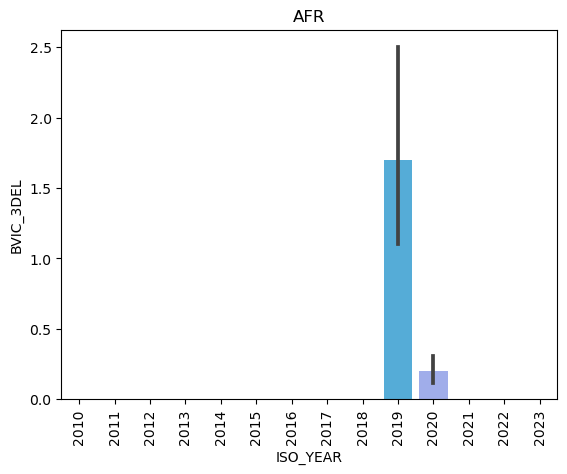

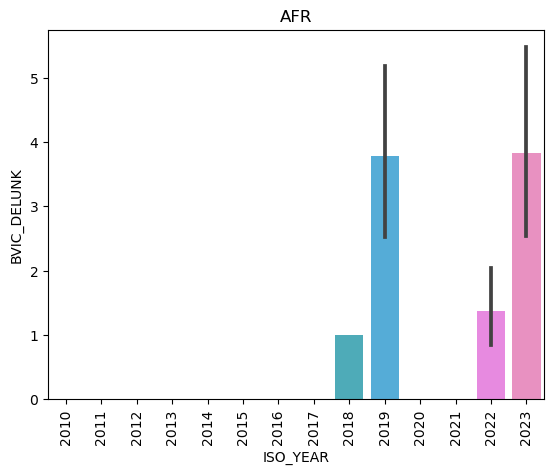

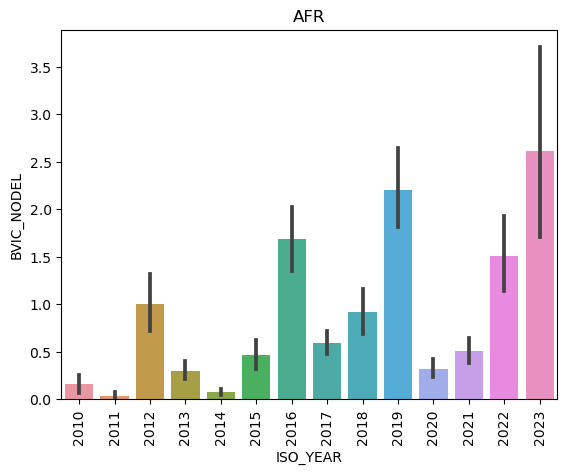

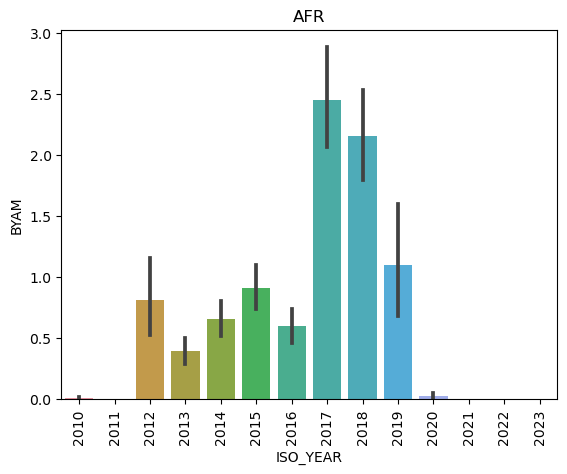

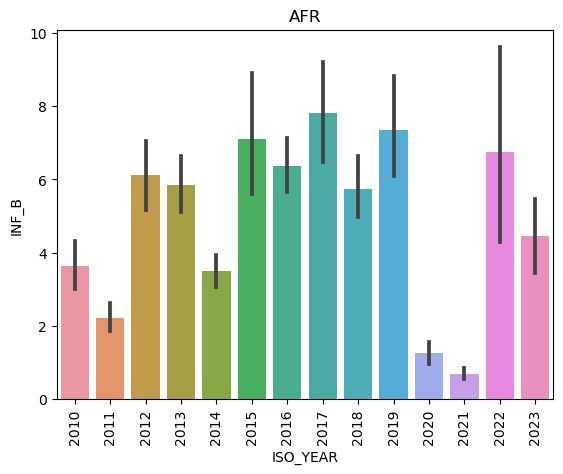

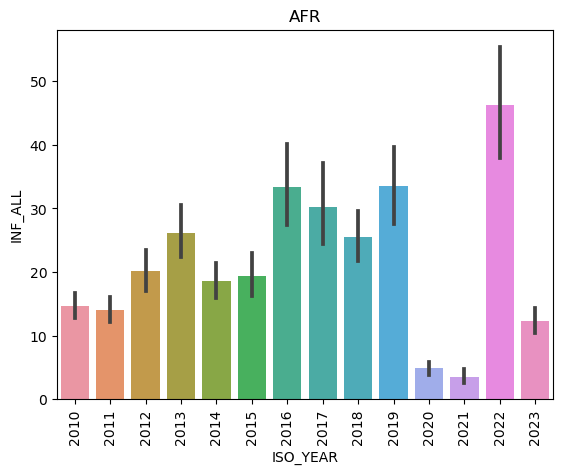

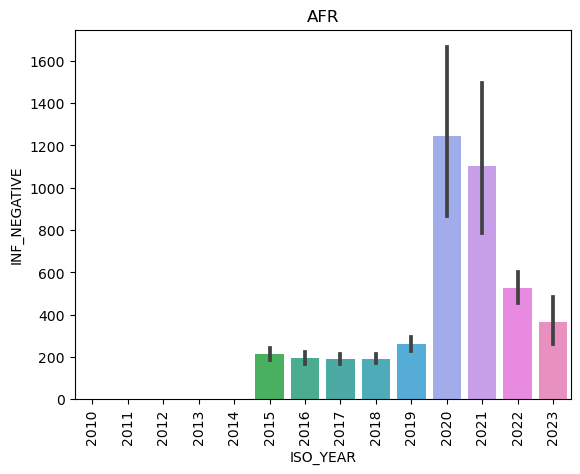

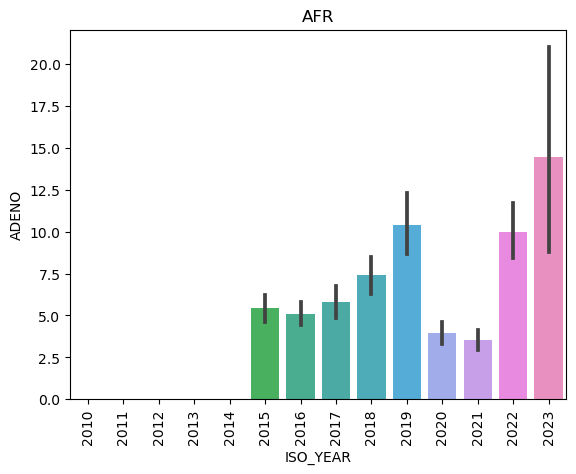

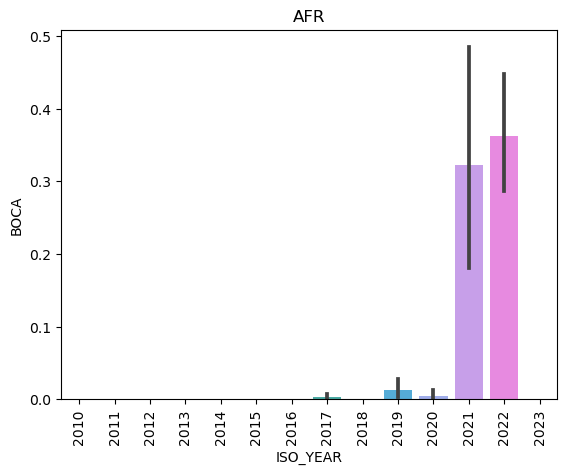

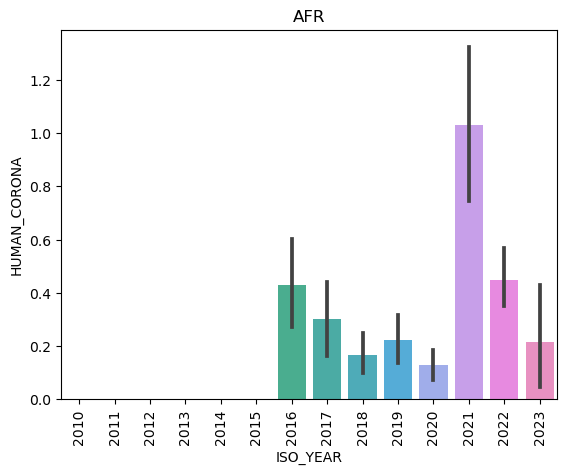

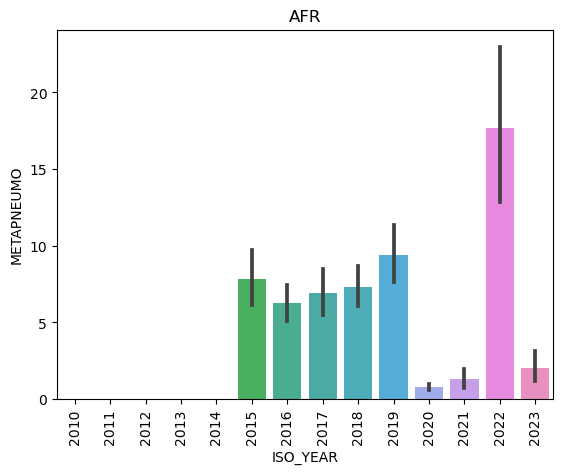

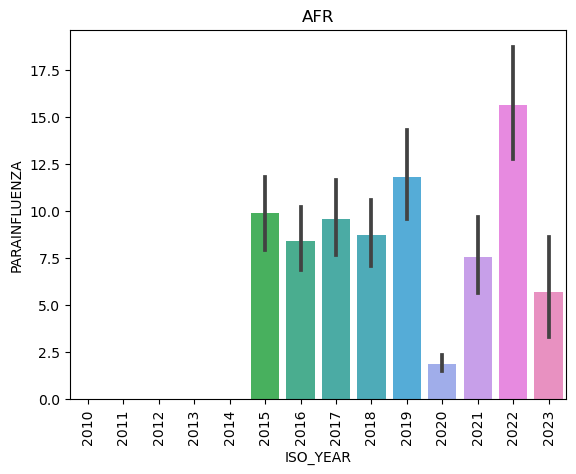

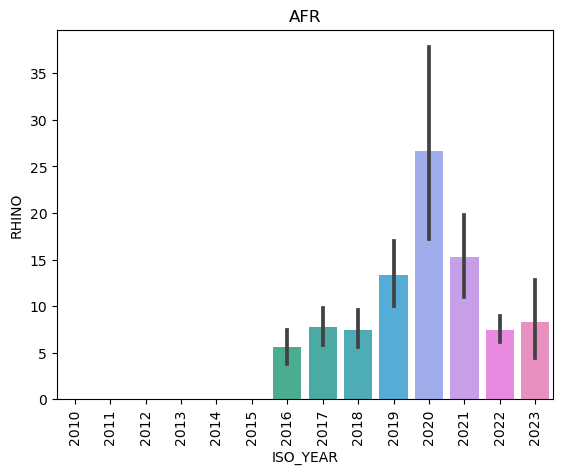

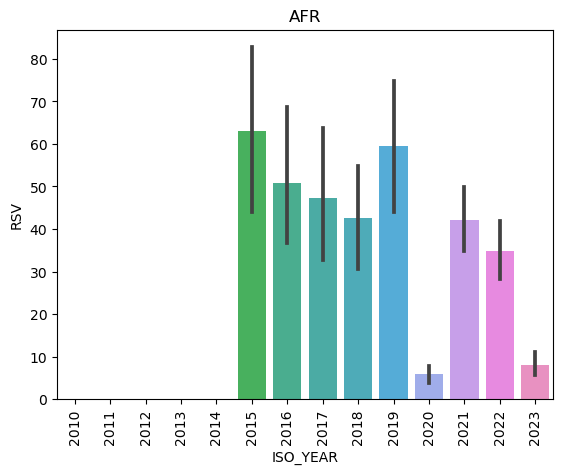

In [17]:
for region in unique_region:
    for column in unique_col:
        sns.barplot(data = shDF, x = 'ISO_YEAR', y = column).set_xticklabels(labels = year, rotation = 90)
        plt.title(f"{region}")
        plt.show()

In [19]:
print(shDF.isnull().sum())

WHOREGION            0
COUNTRY_CODE         0
ISO_YEAR             0
ORIGIN_SOURCE        0
AH1N12009         1379
AH1               5363
AH3               1264
AH5               6208
AH7N9            12282
INF_A             1127
BVIC_2DEL        13584
BVIC_3DEL        14153
BVIC_DELUNK      13466
BVIC_NODEL        3181
BYAM              3310
INF_B             1109
INF_ALL           1332
INF_NEGATIVE      7184
ADENO            10289
BOCA             12007
HUMAN_CORONA     12323
METAPNEUMO       10520
PARAINFLUENZA    10368
RHINO            11602
RSV               9429
dtype: int64


In [20]:
unique_columns = shDF.columns.tolist()
del unique_columns[0:4]
print(unique_columns)


['AH1N12009', 'AH1', 'AH3', 'AH5', 'AH7N9', 'INF_A', 'BVIC_2DEL', 'BVIC_3DEL', 'BVIC_DELUNK', 'BVIC_NODEL', 'BYAM', 'INF_B', 'INF_ALL', 'INF_NEGATIVE', 'ADENO', 'BOCA', 'HUMAN_CORONA', 'METAPNEUMO', 'PARAINFLUENZA', 'RHINO', 'RSV']


In [21]:
for col in unique_columns:
    country_means = shDF.groupby('COUNTRY_CODE')[col].mean()
    shDF[col] = shDF.apply(lambda row : country_means[row['COUNTRY_CODE']] if pd.isnull(row[col]) else row[col], axis = 1)

In [22]:
print(shDF.isnull().sum())

WHOREGION           0
COUNTRY_CODE        0
ISO_YEAR            0
ORIGIN_SOURCE       0
AH1N12009           0
AH1               119
AH3                 0
AH5              2523
AH7N9            7574
INF_A               0
BVIC_2DEL        8453
BVIC_3DEL        9197
BVIC_DELUNK      8453
BVIC_NODEL          0
BYAM                0
INF_B               0
INF_ALL             0
INF_NEGATIVE      688
ADENO            1796
BOCA             3944
HUMAN_CORONA     5136
METAPNEUMO       2253
PARAINFLUENZA    2523
RHINO            2997
RSV              1403
dtype: int64


In [24]:
missing = shDF[shDF.isna().any(axis=1)]

# LOOK BELOW

In [33]:
for col in unique_columns:
    shDF.dropna(subset=[col], inplace=True)

### Unsure if this is the right approach to getting rid of the null values, maybe look into other options
## Also need to talk to Kossek about how we are going to apply a model to this dataset
## Because there is no "target" variable but just counts of disease for each region, unsure of how to proceed?

In [34]:
print(shDF.isnull().sum())

WHOREGION        0.0
COUNTRY_CODE     0.0
ISO_YEAR         0.0
ORIGIN_SOURCE    0.0
AH1N12009        0.0
AH1              0.0
AH3              0.0
AH5              0.0
AH7N9            0.0
INF_A            0.0
BVIC_2DEL        0.0
BVIC_3DEL        0.0
BVIC_DELUNK      0.0
BVIC_NODEL       0.0
BYAM             0.0
INF_B            0.0
INF_ALL          0.0
INF_NEGATIVE     0.0
ADENO            0.0
BOCA             0.0
HUMAN_CORONA     0.0
METAPNEUMO       0.0
PARAINFLUENZA    0.0
RHINO            0.0
RSV              0.0
dtype: float64
